In [7]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from arch import arch_model

In [50]:
returns = pd.read_excel("Data_1.xlsx", header=0, index_col=0, parse_dates=True)*100

In [51]:
returns

,ret
date,
1986-10-31,0.000000
1986-11-30,1.204475
1986-12-31,-0.746390
1987-01-31,6.624790
1987-02-28,1.458332
...,...
2021-06-30,0.844056
2021-07-31,1.639902
2021-08-31,0.884216


In [58]:
model_ret = arch_model(returns['ret'], vol='Garch', p=1, o=0, q=1, dist='Normal', rescale=True, mean='Constant')
res_ret = model_ret.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14120.351989905199
Iteration:      2,   Func. Count:     13,   Neg. LLF: 95291.46641754966
Iteration:      3,   Func. Count:     19,   Neg. LLF: 920.5137033983879
Iteration:      4,   Func. Count:     26,   Neg. LLF: 907.0727453546247
Iteration:      5,   Func. Count:     32,   Neg. LLF: 905.8889786047448
Iteration:      6,   Func. Count:     37,   Neg. LLF: 905.8747901996546
Iteration:      7,   Func. Count:     43,   Neg. LLF: 905.8386916902915
Iteration:      8,   Func. Count:     48,   Neg. LLF: 905.8384680298968
Iteration:      9,   Func. Count:     53,   Neg. LLF: 905.838461926619
Iteration:     10,   Func. Count:     58,   Neg. LLF: 905.8384613334408
Optimization terminated successfully    (Exit mode 0)
            Current function value: 905.8384613334408
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10


In [59]:
res_ret

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -905.838
Distribution:                  Normal   AIC:                           1819.68
Method:            Maximum Likelihood   BIC:                           1835.85
                                        No. Observations:                  421
Date:                Wed, Jan 26 2022   Df Residuals:                      420
Time:                        11:47:06   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.7620  9.349e-02      8.151  3.616e-16 [  0.579,  0.94

In [33]:
import datetime as dt
import pandas_datareader.data as web
djia = web.get_data_fred('DJIA')
returns2 = 100 * djia['DJIA'].pct_change().dropna()


<AxesSubplot:xlabel='DATE'>

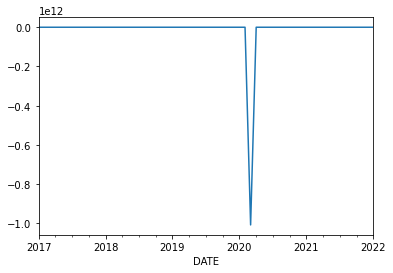

In [64]:
returns22.plot()

<AxesSubplot:xlabel='date'>

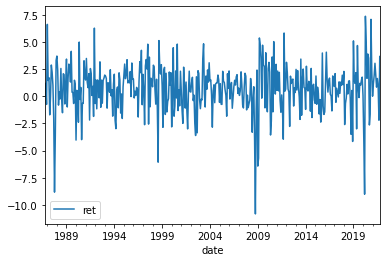

In [53]:
returns.plot()

In [123]:
returns21=returns2/100+1
returns22=(returns21.groupby(pd.Grouper(freq="M")).prod()-1)*100
model_ret2 = arch_model(returns2, p=1, o=0, q=1, dist='Normal', rescale=True, mean='Constant',vol='Garch')
res_ret2 = model_ret2.fit()
res_ret2

Iteration:      1,   Func. Count:      6,   Neg. LLF: 10062.97634787743
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4767616151.873185
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2129.8345466998426
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1594.9272529724235
Iteration:      5,   Func. Count:     36,   Neg. LLF: 3195.288984764604
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1593.0850235341522
Iteration:      7,   Func. Count:     49,   Neg. LLF: 1593.0762423324873
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1593.076215401262
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1593.0762154012411
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1593.076215401262
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   DJIA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1593.08
Distribution:                  Normal   AIC:                           3194.15
Method:            Maximum Likelihood   BIC:                           3214.84
                                        No. Observations:                 1302
Date:                Wed, Jan 26 2022   Df Residuals:                     1301
Time:                        14:10:16   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0881  1.802e-02      4.888  1.018e-06 [5.278e-0

In [96]:
fixed_res = model_ret2.volatility('EMWAVariance')
print(fixed_res.summary())

TypeError: 'GARCH' object is not callable

In [124]:
am = ConstantMean(returns2)
am.volatility = EWMAVariance(None)
am.distribution = Normal()
res = am.fit()
res

Iteration:      1,   Func. Count:      4,   Neg. LLF: 11283.410316824971
Iteration:      2,   Func. Count:     10,   Neg. LLF: 449007.0200884031
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1646.1875886569537
Iteration:      4,   Func. Count:     18,   Neg. LLF: 1645.927195929552
Iteration:      5,   Func. Count:     21,   Neg. LLF: 1645.925423898731
Iteration:      6,   Func. Count:     24,   Neg. LLF: 1645.92541957925
Iteration:      7,   Func. Count:     26,   Neg. LLF: 1645.9254195791968
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1645.92541957925
            Iterations: 7
            Function evaluations: 26
            Gradient evaluations: 7


                Constant Mean - EWMA/RiskMetrics Model Results                
Dep. Variable:                   DJIA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:           EWMA/RiskMetrics   Log-Likelihood:               -1645.93
Distribution:                  Normal   AIC:                           3295.85
Method:            Maximum Likelihood   BIC:                           3306.19
                                        No. Observations:                 1302
Date:                Wed, Jan 26 2022   Df Residuals:                     1301
Time:                        14:19:06   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0759  3.379e-02      2.245  2.477e-02 [9.634e-0

In [120]:
import datetime as dt

import pandas_datareader.data as web

from arch import arch_model

from arch.univariate import ZeroMean, GARCH, Normal

In [108]:
from arch.univariate import EWMAVariance

In [117]:
res.params

mu    0.066429
Name: params, dtype: float64

In [125]:
res.conditional_volatility()

TypeError: 'Series' object is not callable